# NN - Convolutional Neural Networks (part1)

This notebook introduces to Convolutional Neural Networks.

### How computer sees image?

![](https://analyticsindiamag.com/wp-content/uploads/2018/02/AIM_Logo_RGB-1-copy.png)

The dimensionality of MNIST dataset is $28\times 28\times 1=784$. Note that the images are greyscale and the resolution is lower than what is usually found in real world. 
Mathematically images can be uniquely represented as $H×W\times C$ shaped tensor where $H$ and $W$ are the pixel resolutions for each side and $C$ represents the number of color channels. In each channel every element of the matrix is in range $[0,255]$ which represents spectrum of Red, Green, Blue colors ($RGB$). 
For example:

$1080p(1920×1080)$ image resolution can be represented by $1920×1080×3 = 6.220.800$ numbers<br/>
$1440p(1920×1440)$ image resolution can be represented by $1920×1440×3 = 8.294.400$ numbers<br/>
$4k(3840×2160)$ image resolution can be represented by $3840×2160×3 = 324.883.200$ numbers


## Kernel

![](https://i.pinimg.com/originals/dc/62/e2/dc62e297becf77b016e2c9f5d05b0dc9.gif)

We as humans see in shapes, so how we can help NN-s to see shapes not single pixels? 

For simplicity lets think of greyscale (1 channel) image
![](https://www.tensorflow.org/images/MNIST-Matrix.png)

How is it different from this

![](https://raw.githubusercontent.com/rohan-varma/rohan-blog/master/images/mnistimg.png)

What if we try to featurize the picture?

We can decompose any image to collection of simple geometric shapes, like edges, lines, etc. Than use that to classify the image

For example:

$1$ can be thought as single straight line somewhere in the center of the image

$8$ can be though as $2$ linked curved ball like features in the center of the image, etc

For more complex examples the relationship is more hierarchical. E.G. using simpler features you compose more complex features

We need to emphasize certain features or remove other features. In classical image processing it's called image filtering. 

And the way way to define what features we want in new image is called kernel or filter.

Let's show how it works on example below
We have $5\times 5\times 1$ matrix which represents image. To perform convolution we take $N\times M$ matrix (usually $3×3$ or $5×5$, in our case $3\times 3$) and stride it by $1$ (one pixel at a time, note that it' not necessary to stride by $1$) to the right. On each step we perform elementwise matrix multiplication, sum the products and write down the resulted number in new matrix.

![](http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/3.JPG)
![](https://miro.medium.com/max/1052/1*GcI7G-JLAQiEoCON7xFbhg.gif)

In [0]:
#@title Imports
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#@title Functions 
def im2col(input,axis = "column"):
  if axis == "column":
    final = input.reshape(-1,1)
  if axis == "row":
    final = input.reshape(1,-1)
  return final

def zero_pad(input):
  return np.pad(input,((1,1),(1,1)),"constant")

def convolution(input, kernel, pad = "Same"):
  if pad == "Same":
    input = zero_pad(input)
  input_size = input.shape[0]
  col_kernel = im2col(kernel,"row")
  kernel_size = col_kernel.shape[1]
  A = np.empty((kernel_size,0))

  for i in range(1,input_size-1):
    for j in range(1,input_size-1):
      A = np.append(A,im2col(input[i-1:i+2,j-1:j+2]), axis = 1)
  
  col_kernel = im2col(kernel,"row")
  conv = col_kernel@A
  return conv.reshape(input_size-2,input_size-2)

def pooling(input, mod = "max", stride = 2):
  input_size = input.shape[0]
  A = np.empty((0,1))
  if mod == "max":
    for i in range(0,input_size,stride):
      for j in range(0,input_size,stride):
        A = np.append(A,np.max(input[i:i+2,j:j+2]))
  elif mod == "mean":
    for i in range(0,input_size,stride):
      for j in range(0,input_size,stride):
        A = np.append(A,np.mean(input[i:i+2,j:j+2]))

  return A.reshape(int(input_size/2),int(input_size/2))


In [5]:
#@title Importing data and assigning hyperparameters
#Initialising parameters
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

#Choose data
mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)
x_train, x_test = x_train / 255.0, x_test / 255.0

input_shape = (img_rows,img_cols,1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#@title Kernels
kernel_1 = np.array([[-1,-1,-1],
                   [2,2,2],
                   [-1,-1,-1]])
kernel_2 = np.array([[-1,2,-1],
                   [-1,2,-1],
                   [-1,2,-1]])

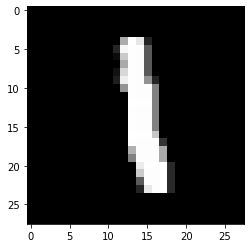

In [9]:
img_1 = x_train[6].squeeze(axis = 2) #0 is 5, 2 is 4, 31 is 8, 6 is 1, 8 is 4
#img_2 = x_train[31].squeeze(axis = 2) 
plt.imshow(img_1,cmap = "Greys_r")

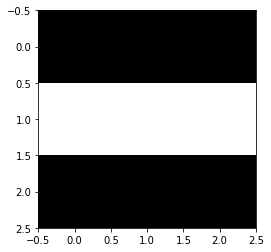

In [10]:
plt.imshow(kernel_1,cmap = "Greys_r")

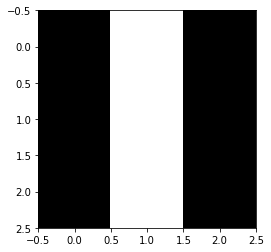

In [11]:
plt.imshow(kernel_2,cmap = "Greys_r")

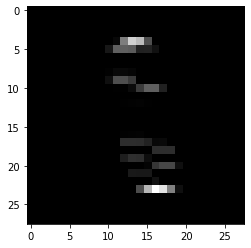

In [12]:
conv = convolution(img_1,kernel_1)
plt.imshow(np.maximum(conv,0),cmap = "Greys_r")

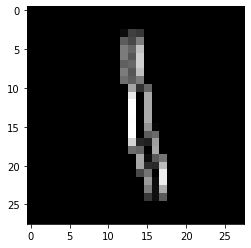

In [13]:
conv = convolution(img_1,kernel_2)
plt.imshow(np.maximum(0,conv),cmap = "Greys_r")

Try to explain why the image has "outline"?

**Warmup 10 minutes** 

Play with the kernels, images and http://setosa.io/ev/image-kernels/

Skim through http://aishack.in/tutorials/image-convolution-examples/ , https://en.wikipedia.org/wiki/Kernel_(image_processing)

## CNN

Architecture of CNN can be described by 3 distinct layers:
1. Convolutional layer
2. Pooling layer
3. Fully connected layer



![](https://static.wixstatic.com/media/d77a32_076f341258d24f47852625faaa726620~mv2.jpeg/v1/fill/w_1422,h_760,al_c,q_85,usm_0.66_1.00_0.01/1_uAeANQIOQPqWZnnuH-VEyw.webp)

### Convolutional layer

First layer of CNN is called convolutional layer.

![](https://miro.medium.com/max/1052/1*GcI7G-JLAQiEoCON7xFbhg.gif)

As you may have noticed in this example after convolution the size of matrix decreased from $5\times 5$ to $3\times 3$.

It is convenient to pad the input with zeros around the border. The size of this zero-padding is a hyperparameter. The main benefit of zero padding is to allow the control of the size's output. Most commonly we will use it to keep the input and output of convolutional layer same size (width and height), as the pooling layer will be used for downsampling.

In case of full image with all RGB colors:

![](https://miro.medium.com/max/2560/1*ciDgQEjViWLnCbmX-EeSrA.gif)

![](https://miro.medium.com/max/3726/1*wqZ0Q4mBaHKjqWx45GPIow.gif)

$X$ matrix is the input and $W$ Matrix is the kernel wieghts we should learn. Thus, convolutional layers adopt the idea of weight sharing, i.e. same weight connections are used between some set of neurons (this means the backprop will update those 2 weights identically). Weight sharing also has the feature of being position invariant, i.e. it cares that an object (e.g. person) exists but not where it is.

The amount of learnt weights for each convolutional layer are 

$N\times M\times D_0\times D_1 +D_1(bias)$ 

where:

$N\times M$ are the dimensions of the kernel 

$D_0$ is the number of channels (also number of kernels) from previous layer. 

$D_1$ is the number of kernels for current layer. 

For 3x3 sized kernel and 32 kernels and for 1 color channel image we will have $3\times 3\times 1\times 32+32 = 320$ parameters to learn. For 3 color channel image the number of parameters will be $3\times 3\times 3\times 32+32 = 896$

![title](https://miro.medium.com/max/1600/1*QgiVWSD6GscHh9nt55EfXg.gif)

Suppose we use padding in a way which creates the same dimensions of image. If we use fully connected layer then the number of parameters would be 32x32x32x32+32x32 which is already a huge number.

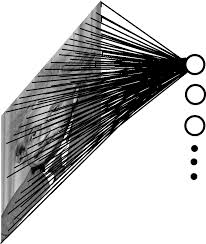

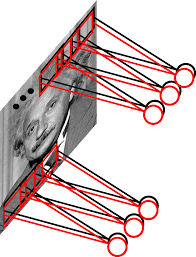

Ideally the first convolutional layer should learn to detect features like edges, lines etc, while convolutional layers built on top of the first one should hiearchically learn more and more complex features.

![title](https://thegradient.pub/content/images/2018/07/image_3.png)

### Warm ups
Name the properties of convolutions, e.g. size, strides, padding, etc.

![alt text](https://upload.wikimedia.org/wikipedia/commons/0/06/Convolution_arithmetic_-_Full_padding_no_strides.gif)

![alt text](https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/conv_arithmetic/full_padding_no_strides_transposed_small.gif)

![alt text](https://miro.medium.com/max/1580/1*btockft7dtKyzwXqfq70_w.gif)

![alt text](https://upload.wikimedia.org/wikipedia/commons/9/92/Convolution_arithmetic_-_Padding_strides_transposed.gif)

![alt text](https://m-alcu.github.io/assets/stride1.gif)

### Pooling Layer

It is common to insert a pooling layer between convolutional layers. Pooling layer reduces the dimensions of images which also reduces the computation needed. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant.

![](http://ddrvcn.oss-cn-hangzhou.aliyuncs.com/2019/5/7VfABn.png)

Pooling layer is usually used in 2 ways: MAX pooling and AVERAGE pooling. It's a matrix which performs certain operation (MAX or AVERAGE) over the portion of image it covers. It is considered that MAX pooling performs much better than AVERAGE pooling as it discards noisy activations while AVERAGE pooling blurs the output.

![](https://mmbiz.qpic.cn/mmbiz_png/bicdMLzImlibRsMn1llJLMZiaJ0CnHHAfxgKvNeoMpv00SLOaCh5ImFgYndnaSTYQVYDSlmwBiaP3mVcnwDDkmuodw/640?wx_fmt=png)

### Fully Connected Layer
Passing through convolutional and pooling layer we finally need to implement a few fully connected layers. The main reason is that we have fixed size output vector in classification tasks. Convolutional and pooling layers can be applied on different sized inputs but fully connected layer can't. Thus, the fully connected layers act as another neural network which try to classify on features extracted from convolutional and pooling layers.


#Code

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Initialising parameters
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
#Choose data
mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)
x_train, x_test = x_train / 255.0, x_test / 255.0

input_shape = (img_rows,img_cols,1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [53]:
#Defining model
model = Sequential()
model.add(Conv2D(10, kernel_size=(3, 3),  # Start with Convolutional layer with 10 kernel depth with 3x3 dimensions,
                 activation='relu',       # With RELU activator
                 strides=1,               # With 1 stride
                 padding='same',          # And same padding (to have same dimensions)
                 input_shape=input_shape,
                 use_bias=False))   

model.add(Conv2D(10, kernel_size=(3, 3),
                 activation='relu',
                 strides=1,               # With 1 stride
                 padding='same',
                 use_bias=False))         # Second layer is convolutional layer as well with same parameters       

model.add(MaxPooling2D(pool_size=(2, 2),  # Third layer is pooling layer of 2x2 dimensionality 
                 strides=None))           # With no strides (halves the output))        
model.add(Dropout(0.25))
model.add(Flatten())                      # Command to flatten the output for Dense layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 10)        90        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 10)        900       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                125504    
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)               

In [52]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.5372 - accuracy: 0.8320 - val_loss: 0.1351 - val_accuracy: 0.9584
Epoch 2/10
22144/60000 [==========>...................] - ETA: 1s - loss: 0.2601 - accuracy: 0.9216

KeyboardInterrupt: ignored

In [0]:
def im2col(input,axis = "column"):
  if axis == "column":
    final = input.reshape(-1,1)
  if axis == "row":
    final = input.reshape(1,-1)
  return final

def zero_pad(input):
  return np.pad(input,((1,1),(1,1)),"constant")

def convolution(input, kernel, pad = "Same"):
  if pad == "Same":
    input = zero_pad(input)
  input_size = input.shape[0]
  col_kernel = im2col(kernel,"row")
  kernel_size = col_kernel.shape[1]
  A = np.empty((kernel_size,0))

  for i in range(1,input_size-1):
    for j in range(1,input_size-1):
      A = np.append(A,im2col(input[i-1:i+2,j-1:j+2]), axis = 1)
  
  col_kernel = im2col(kernel,"row")
  conv = col_kernel@A
  return conv.reshape(input_size-2,input_size-2)

def pooling(input, mod = "max", stride = 2):
  input_size = input.shape[0]
  A = np.empty((0,1))
  if mod == "max":
    for i in range(0,input_size,stride):
      for j in range(0,input_size,stride):
        A = np.append(A,np.max(input[i:i+2,j:j+2]))
  elif mod == "mean":
    for i in range(0,input_size,stride):
      for j in range(0,input_size,stride):
        A = np.append(A,np.mean(input[i:i+2,j:j+2]))

  return A.reshape(int(input_size/2),int(input_size/2))



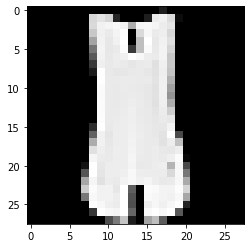

In [38]:
img_1 = x_train[4].squeeze(axis = 2) #0 is 5, 2 is 4, 31 is 8, 6 is 1, 8 is 4
img_2 = x_train[5006].squeeze(axis = 2) 
plt.imshow(img_1,cmap = "Greys_r")

First conv layer without relu

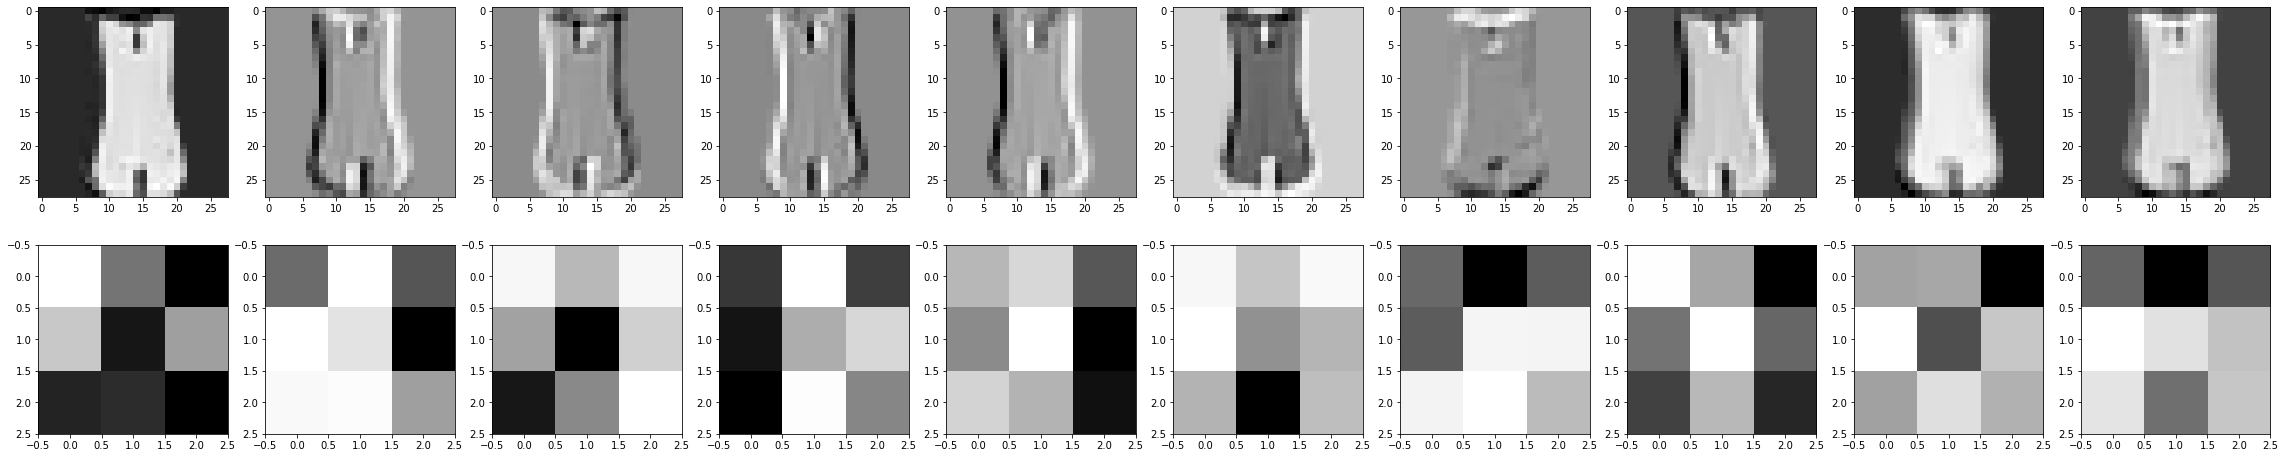

In [39]:
k = 10
fig, axes = plt.subplots(2,k,figsize = (k*4,8))
for i in range(k):
  conv = convolution(img_1,model.weights[0][:,:,0,i].numpy())
  axes[0,i].imshow(conv, cmap = "Greys_r")
  axes[1,i].imshow(model.weights[0][:,:,0,i].numpy(), cmap = "Greys_r")

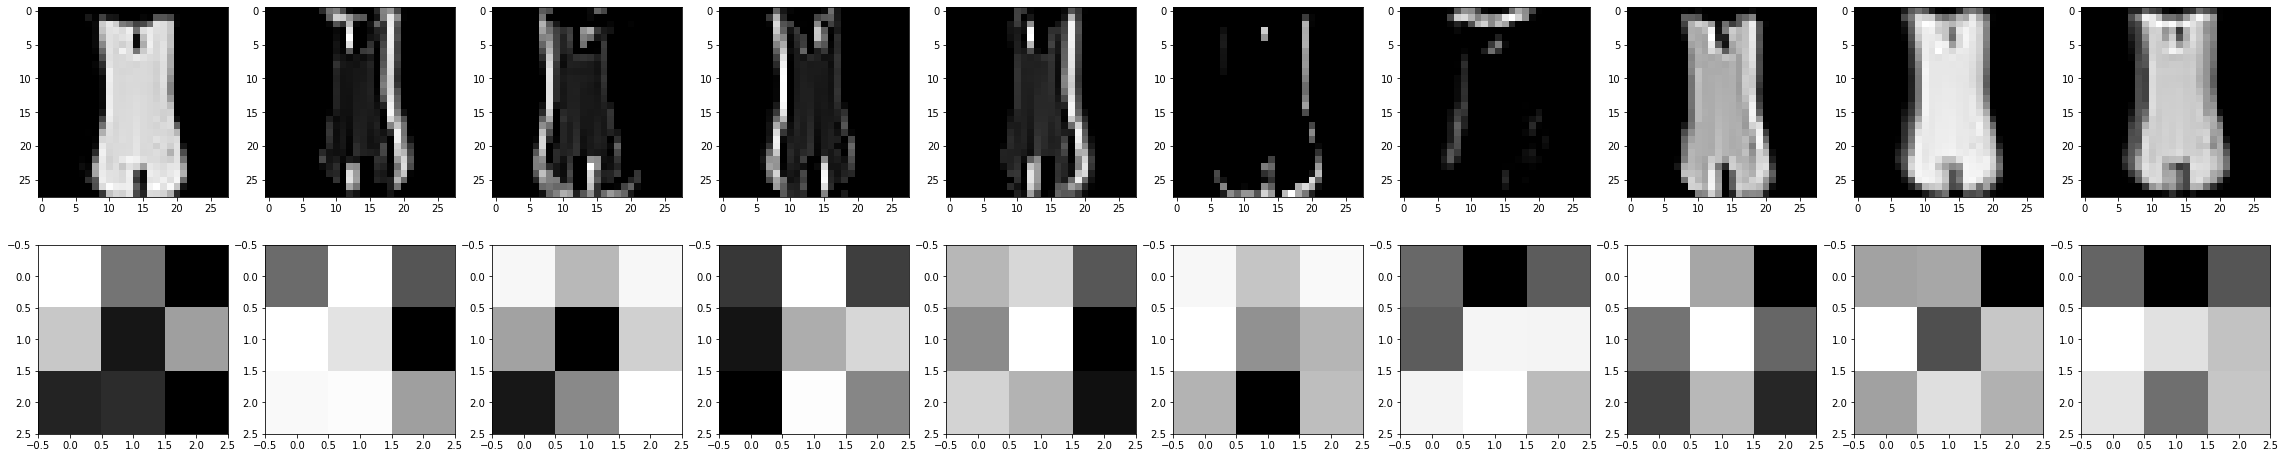

In [40]:
conv_list_1 = []

k = 10
fig, axes = plt.subplots(2,k,figsize = (k*4,8))
for i in range(k):
  conv = convolution(img_1,model.weights[0][:,:,0,i].numpy())#+model.weights[1][i].numpy()
  relu_conv = np.maximum(conv,0)
  axes[0,i].imshow(relu_conv, cmap = "Greys_r")
  axes[1,i].imshow(model.weights[0][:,:,0,i].numpy(), cmap = "Greys_r") 
  conv_list_1.append(relu_conv)

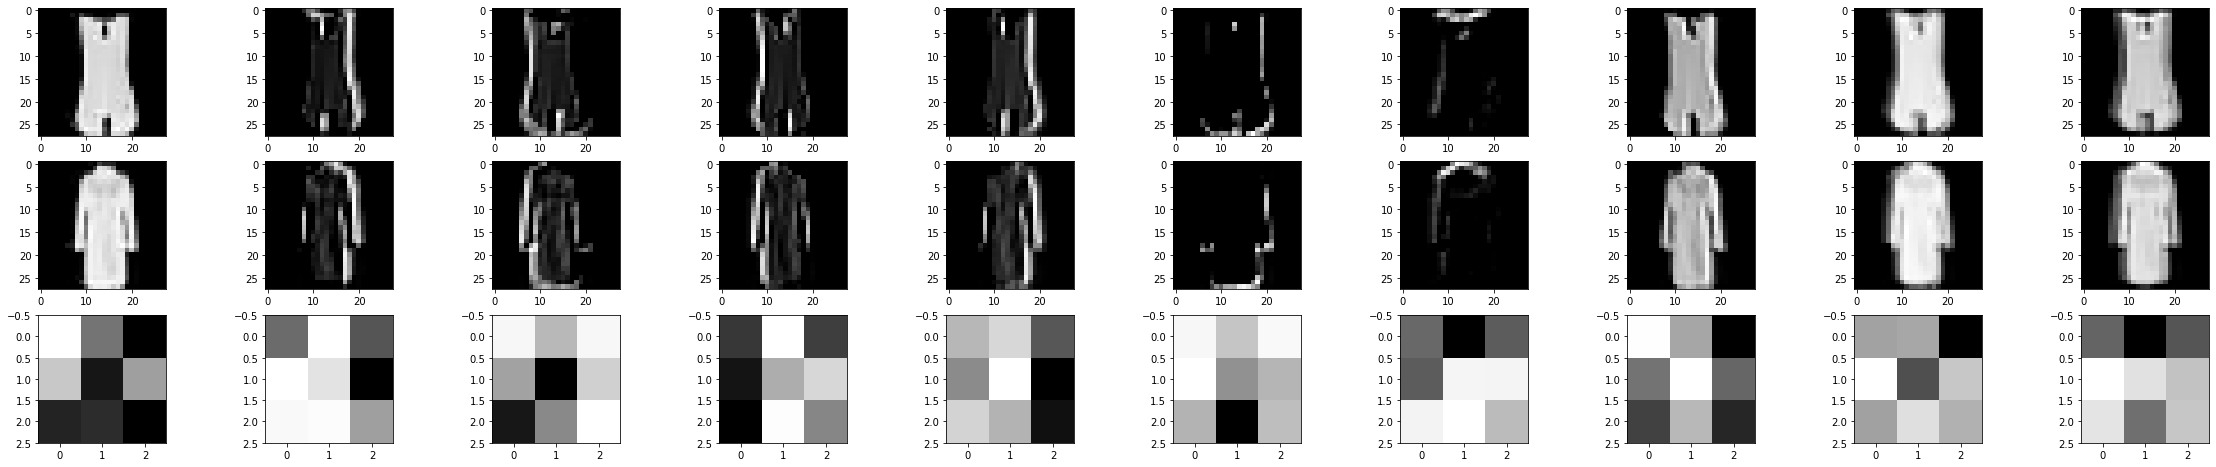

In [41]:
conv_list_1 = []

k = 10
fig, axes = plt.subplots(3,k,figsize = (k*4,8))
for i in range(k):
  conv_1 = convolution(img_1,model.weights[0][:,:,0,i].numpy())
  relu_conv = np.maximum(conv_1,0)

  conv_2 = convolution(img_2,model.weights[0][:,:,0,i].numpy())
  relu_conv_2 = np.maximum(conv_2,0)

  axes[0,i].imshow(relu_conv, cmap = "Greys_r")
  axes[1,i].imshow(relu_conv_2, cmap = "Greys_r")
  axes[2,i].imshow(model.weights[0][:,:,0,i].numpy(), cmap = "Greys_r") 
  conv_list_1.append(relu_conv)

Second layer

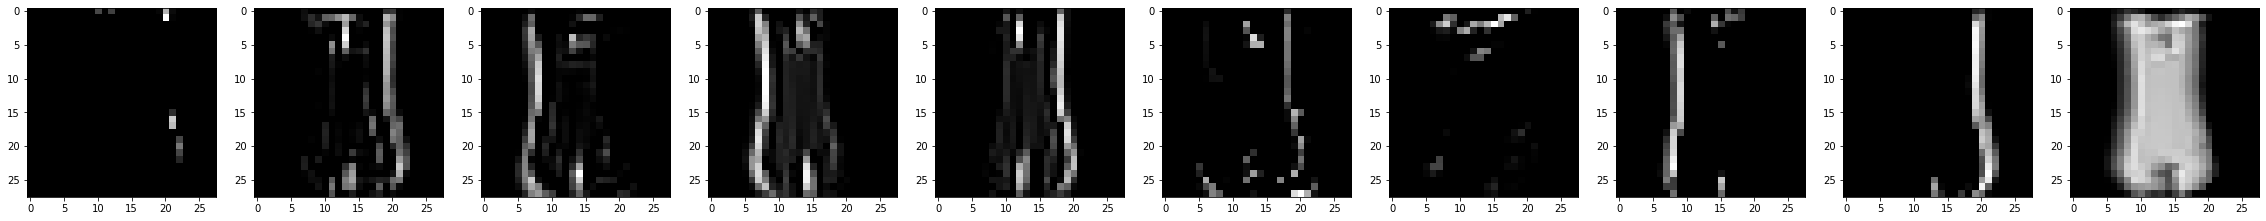

In [42]:
conv_list_2 = []

k = 10
fig, axes = plt.subplots(1,k,figsize = (k*4,8))
for i in range(k):
  conv_1 = np.empty((28,28))
  for j in range(k):
    conv_1 =+ convolution(conv_list_1[i],model.weights[1][:,:,j,i].numpy())
  relu_conv = np.maximum(conv_1,0)
  axes[i].imshow(relu_conv,cmap = "Greys_r")
  conv_list_2.append(relu_conv)

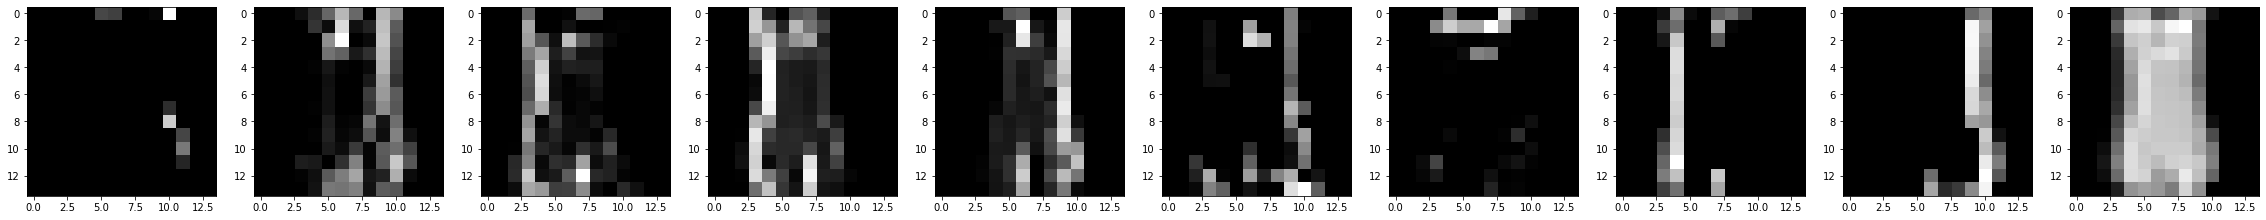

In [43]:
k = 10

fig, axes = plt.subplots(1,k,figsize = (k*4,8))
for i in range(k):
  axes[i].imshow(pooling(conv_list_2[i]),cmap = "Greys_r")

# Exercise

Use the following dataset and construct and train a convolutional neural network , try different architectures https://www.kaggle.com/c/statoil-iceberg-classifier-challenge/overview

http://cs231n.github.io/convolutional-networks/

https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215 

https://arxiv.org/pdf/1603.07285.pdf 

https://sahnimanas.github.io/post/anatomy-of-a-high-performance-convolution/

http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html

https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

# Effective convolution implementation

![](https://sahnimanas.github.io/post/anatomy-of-a-high-performance-convolution/img/matrix-im2col.png)